# Melody Peterson  

# WW Data Scientist (Food Data) Homework

The FNDDS Nutrient values.xlsx file from the USDA (U.S. Department of Agriculture) contains
the complete nutritional information from more than 7000 foods.  
(If you should need it, the background to the FNDDS study is [here](https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/) but for the modeling exercise
below, the data file is self-contained.)  

1. Predict Total Sugar  
a) Build a model from these data to predict the total sugar content / 100g ---that is, the
target variable is in column H---from the other candidate dependent variable columns
A--BQ. 
We are not looking for a perfect model. We are more interested in how you structure the
problem, any exploratory data analysis you might perform, how you select features, and
especially how you evaluate the model’s performance.  
b) Write a few sentences to explain what assumptions you would be making if applying a
model from a US nutrition dataset to the Brazilian market and, given what you know
above, how might you (in)validate those assumptions?  

2. Rank Fruit Sweetness  
Rank the basic fruit groups (cherries, bananas, apple, oranges etc) by their sweetness meaning
total sugar / 100g, Col H. 
You might find the following useful
https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/1718/Food_Category_List.pdf

## Import data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_excel("2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", sheet_name = "FNDDS Nutrient Values",
                  header = 1, index_col = 0)

In [40]:
df.head()

,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)",...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
Food code,,,,,,,,,,,,,,,,,,,,,
11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0.0,1.99,1.164,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,2.154,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


In [92]:
# Remove returns, spaces, and invalid characters from column names
df.index.name = 'Food_code'
for i in [", ", " ", "\n", "-", ":"]:
    df.columns = df.columns.str.replace(i, "_")
df.columns = df.columns.str.replace('(','') 
df.columns = df.columns.str.replace(')','')
df.head()

,Main_food_description,WWEIA_Category_number,WWEIA_Category_description,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,2.009,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0.0,1.99,1.164,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,"Milk, low sodium, whole",1002,"Milk, whole",61,3.10,4.46,4.46,0.0,3.46,2.154,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,"Milk, calcium fortified, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0.0,3.20,1.860,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


In [93]:
df.columns

Index(['Main_food_description', 'WWEIA_Category_number',
       'WWEIA_Category_description', 'Energy_kcal', 'Protein_g',
       'Carbohydrate_g', 'Sugars_total_g', 'Fiber_total_dietary_g',
       'Total_Fat_g', 'Fatty_acids_total_saturated_g',
       'Fatty_acids_total_monounsaturated_g',
       'Fatty_acids_total_polyunsaturated_g', 'Cholesterol_mg', 'Retinol_mcg',
       'Vitamin_A_RAE_mcg_RAE', 'Carotene_alpha_mcg', 'Carotene_beta_mcg',
       'Cryptoxanthin_beta_mcg', 'Lycopene_mcg', 'Lutein_+_zeaxanthin_mcg',
       'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'Vitamin_B_6_mg',
       'Folic_acid_mcg', 'Folate_food_mcg', 'Folate_DFE_mcg_DFE',
       'Folate_total_mcg', 'Choline_total_mg', 'Vitamin_B_12_mcg',
       'Vitamin_B_12_added_mcg', 'Vitamin_C_mg', 'Vitamin_D_D2_+_D3_mcg',
       'Vitamin_E_alpha_tocopherol_mg', 'Vitamin_E_added_mg',
       'Vitamin_K_phylloquinone_mcg', 'Calcium_mg', 'Phosphorus_mg',
       'Magnesium_mg', 'Iron_mg', 'Zinc_mg', 'Copper_mg', 'Selenium_mcg'

In [94]:
df.describe()

,WWEIA_Category_number,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,Fatty_acids_total_monounsaturated_g,Fatty_acids_total_polyunsaturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
count,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,...,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000
mean,4698.965975,197.121559,8.599085,20.828039,7.336660,1.703840,8.958187,2.795032,3.217548,2.173808,...,0.040383,0.010167,1.897950,0.200369,0.002518,0.019184,0.013539,0.004915,0.023334,59.798820
std,2212.828607,140.705036,8.296889,21.887363,12.795577,2.558168,11.049585,4.102655,4.632640,3.899902,...,0.136010,0.113656,3.509074,0.834606,0.018688,0.039292,0.079486,0.019230,0.120919,26.828203
min,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3002.000000,85.000000,2.220000,5.650000,0.780000,0.100000,2.060000,0.503000,0.513000,0.338000,...,0.000000,0.000000,0.228500,0.028000,0.000000,0.000000,0.000000,0.000000,0.000000,45.895000
50%,3802.000000,166.000000,6.190000,13.300000,2.390000,1.000000,5.480000,1.444000,1.869000,1.036000,...,0.011000,0.000000,0.871000,0.089000,0.000000,0.003000,0.000000,0.000000,0.000000,66.590000
75%,6411.500000,274.000000,12.130000,26.195000,7.380000,2.100000,12.650000,3.668500,4.433000,2.625000,...,0.036000,0.000000,2.274000,0.211000,0.000000,0.020000,0.001000,0.002000,0.002000,80.605000
max,9999.000000,902.000000,78.130000,100.000000,99.800000,46.200000,100.000000,82.500000,75.221000,67.849000,...,4.674000,5.166000,65.700000,53.368000,0.664000,0.505000,2.741000,0.380000,3.800000,99.980000


In [95]:
X = df.drop(columns=['Main_food_description','WWEIA_Category_number','WWEIA_Category_description', 'Sugars_total_g'])
y = df['Sugars_total_g']

In [96]:
X.head()

,Energy_kcal,Protein_g,Carbohydrate_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,Fatty_acids_total_monounsaturated_g,Fatty_acids_total_polyunsaturated_g,Cholesterol_mg,Retinol_mcg,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
11000000,70,1.03,6.89,0.0,4.38,2.009,1.658,0.497,14,60,...,0.040,0.0,0.374,0.052,0.0,0.026,0.000,0.000,0.0,87.50
11100000,51,3.34,4.87,0.0,1.99,1.164,0.426,0.065,8,58,...,0.002,0.0,0.069,0.007,0.0,0.003,0.000,0.001,0.0,89.04
11111000,60,3.28,4.67,0.0,3.20,1.860,0.688,0.108,12,31,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10
11111100,61,3.10,4.46,0.0,3.46,2.154,0.999,0.128,14,28,...,0.000,0.0,0.078,0.050,0.0,0.000,0.000,0.000,0.0,88.20
11111150,60,3.28,4.67,0.0,3.20,1.860,0.688,0.108,12,31,...,0.004,0.0,0.115,0.012,0.0,0.004,0.001,0.002,0.0,88.10


## Exploratory Data Analysis

### Basic graphs

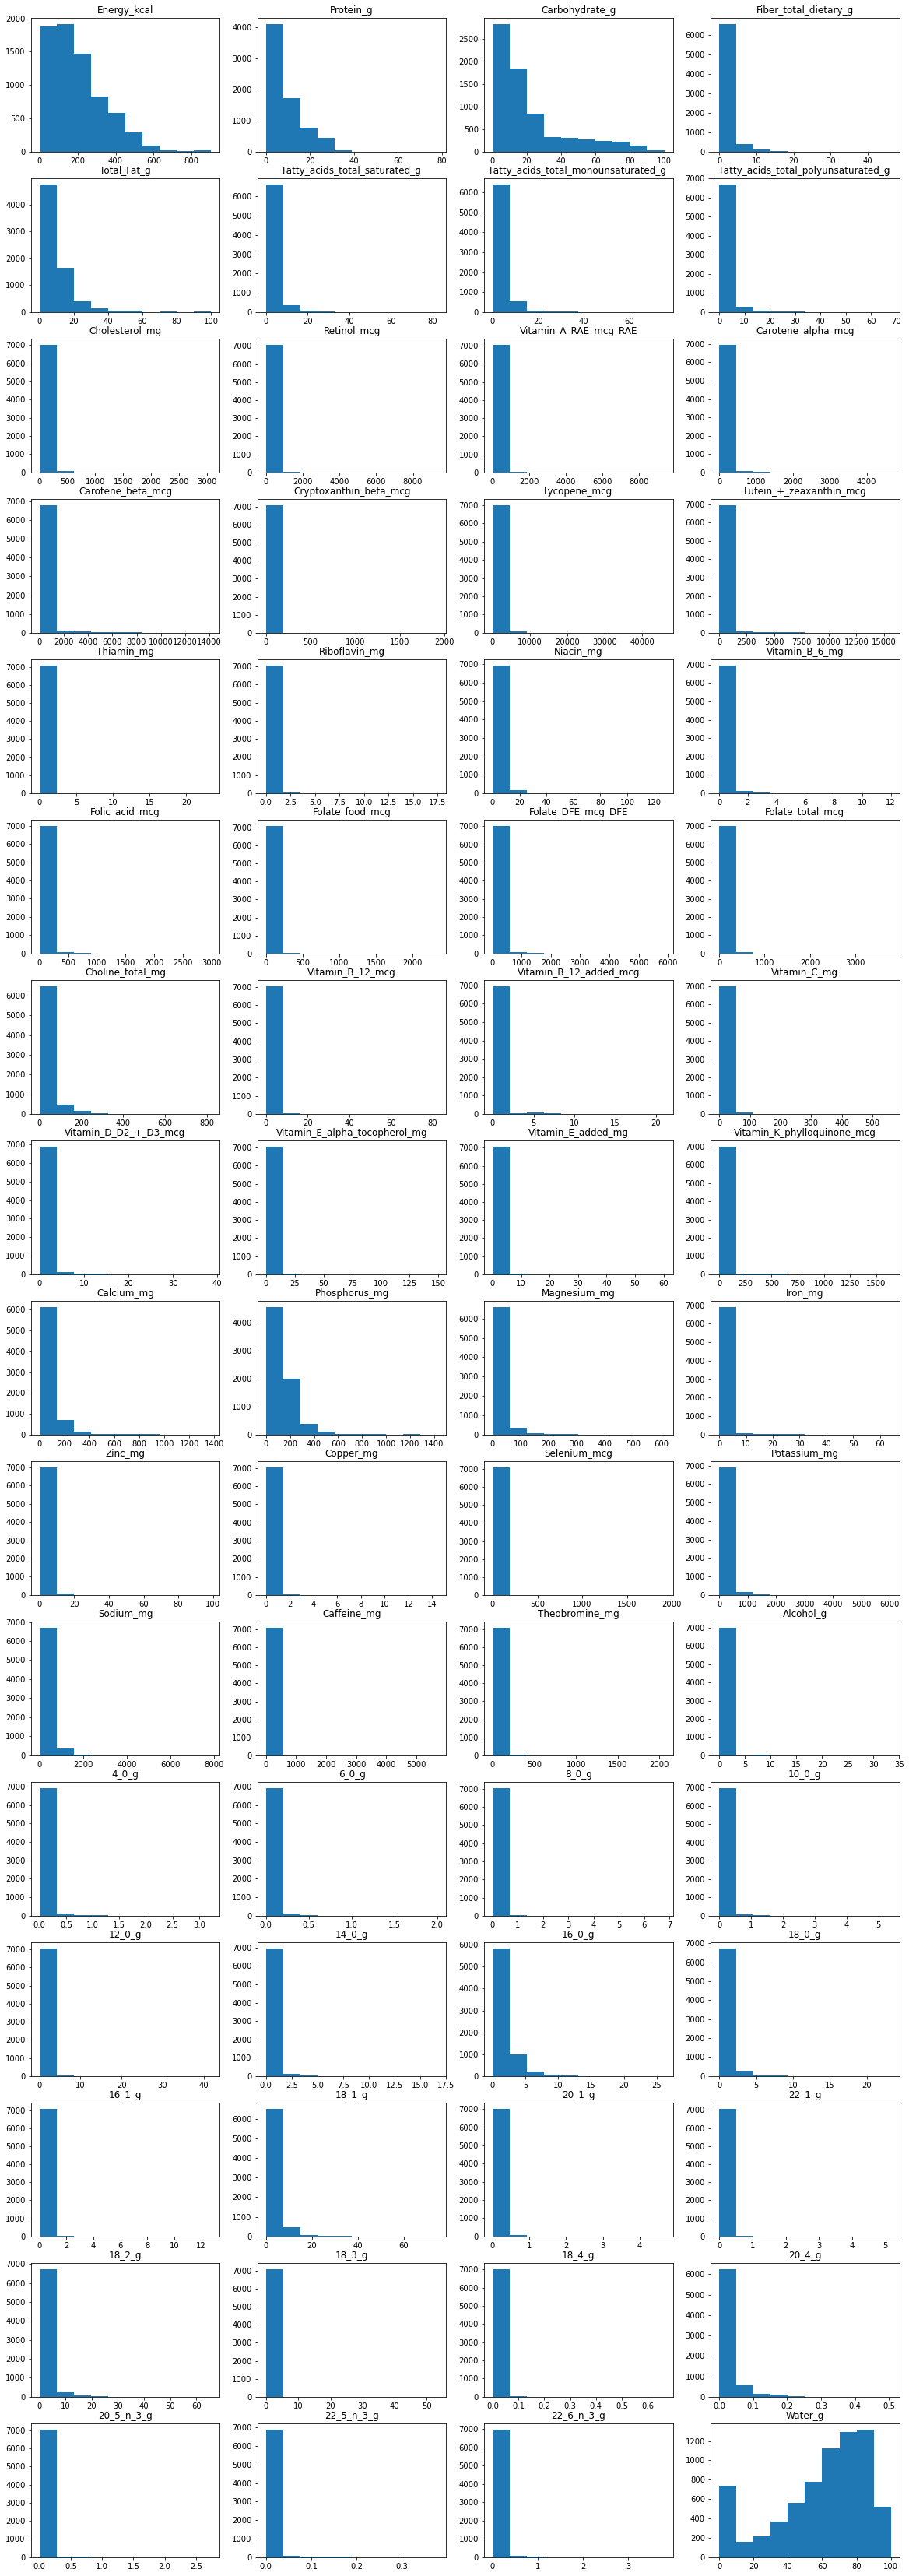

In [97]:
fig, axes = plt.subplots(nrows=16, ncols=4, figsize=(20,60))
for n in range(len(X.columns)):
    row=(n)//4
    col=(n)%4
    ax=axes[row][col]
    x=X.iloc[:,n]
    ax.hist(x)
    ax.set_title(X.columns.values[n])
plt.show()

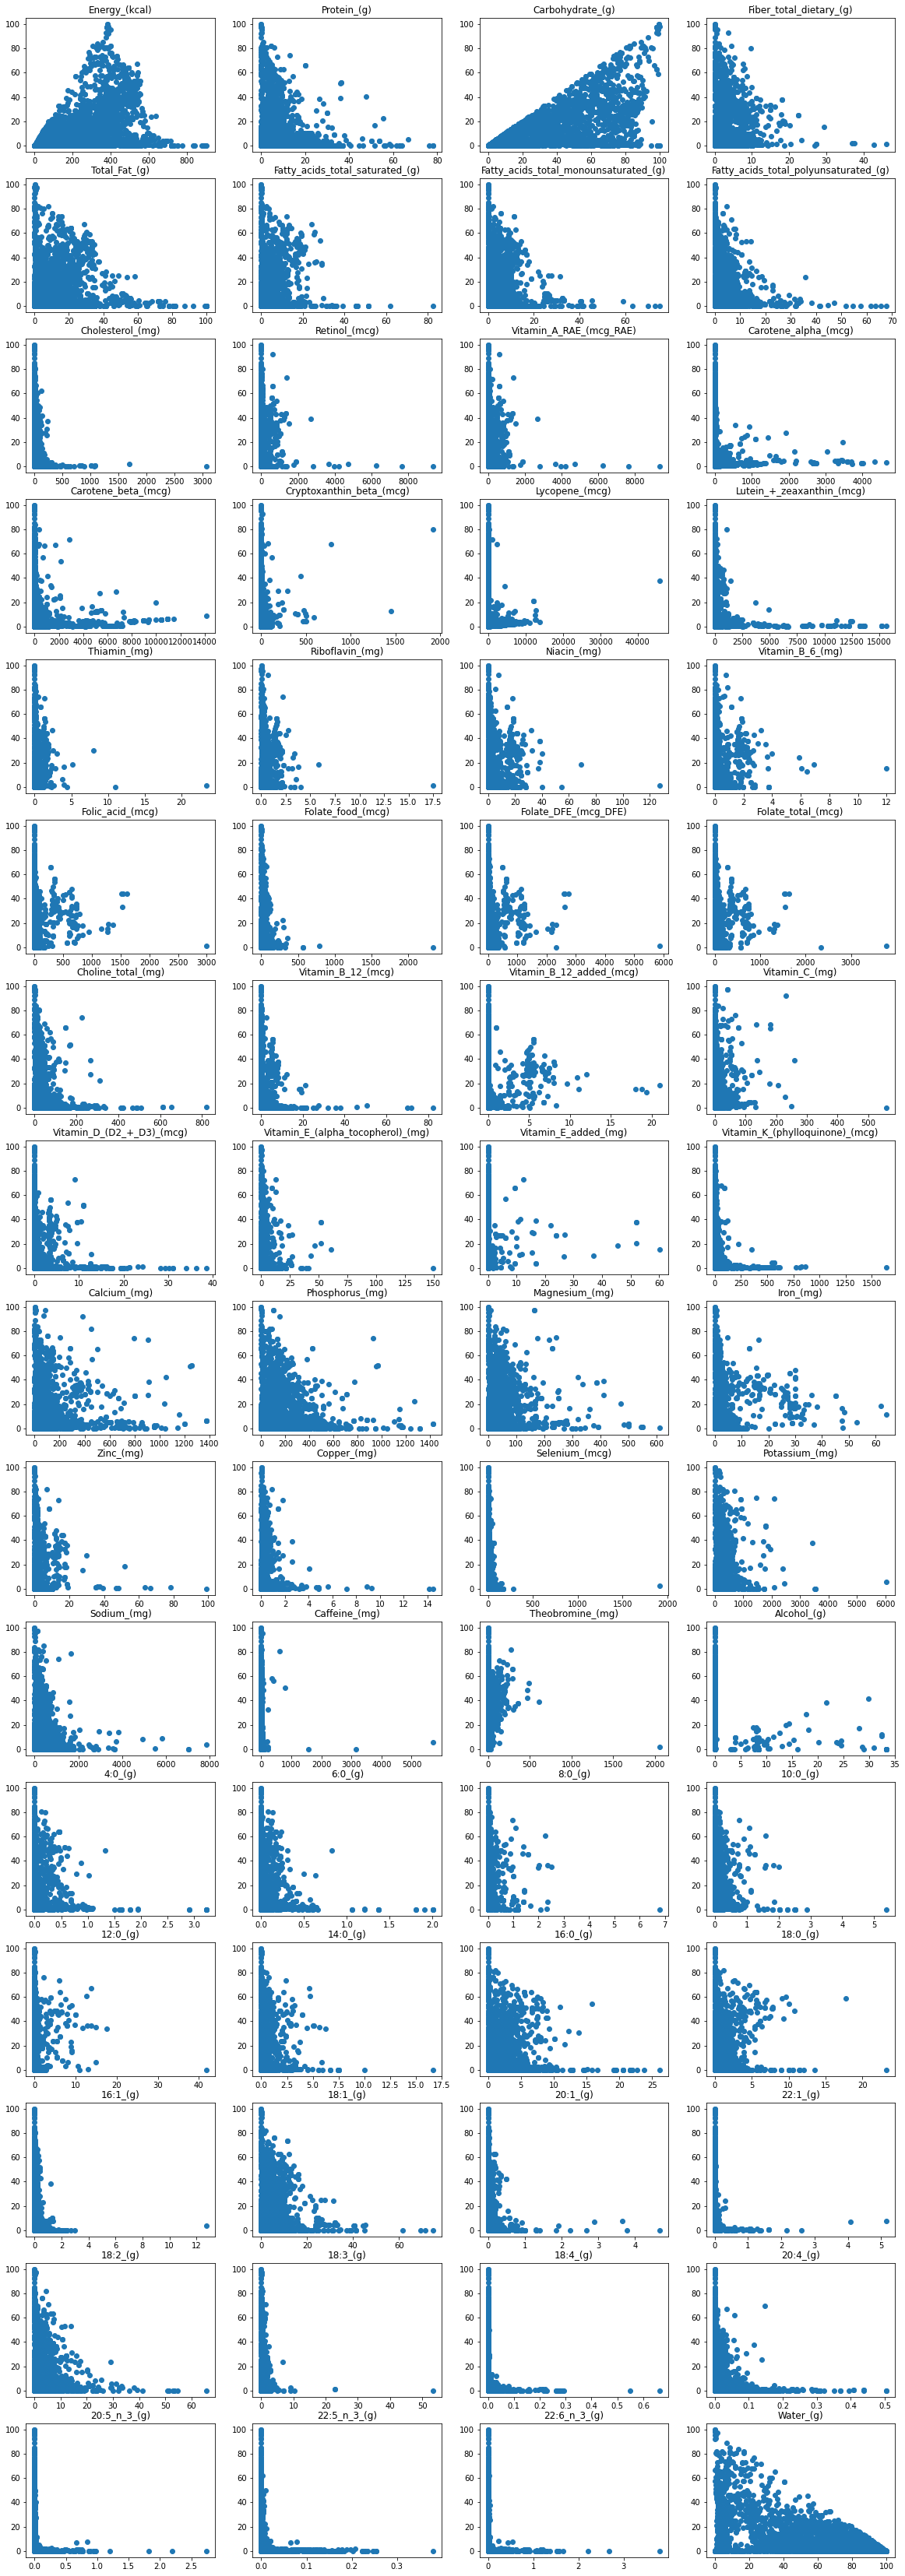

In [98]:
fig, axes = plt.subplots(nrows=16, ncols=4, figsize=(20,60))
for n, column in enumerate(X.columns):
    row=(n)//4
    col=n%4
    ax=axes[row][col]
    x=X[column]
    y=df['Sugars_total_g']
    ax.scatter(x, y)
    ax.set_title(regressors.columns.values[n])
plt.show()

## Initial OLS regression

In [99]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape)

X_train:  (5312, 64) 
X_test:  (1771, 64)


In [146]:
y_train

Food_code
24209001     9.97
57124050    26.10
91746200    50.00
25230540     0.00
11710470     7.26
            ...  
26115190     0.00
12350225     6.85
71507020     1.66
27450061     2.70
28520100     0.00
Name: Sugars_total_g, Length: 5312, dtype: float64

In [147]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sugars_total_g   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     144.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:13:51   Log-Likelihood:                -18318.
No. Observations:                5312   AIC:                         3.677e+04
Df Residuals:                    5247   BIC:                         3.719e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -135.8435     21.824     -6.224      0.000    -178.628     -93.059
Energy_kcal                            -0.0928      0.013     -7.086      0.000      -0.118      -0.067
Protein_g                               1.7542      0.224      7.816      0.000       1.314       2.194
Carbohydrate_g                          2.2270      0.225      9.889      0.000       1.786       2.669
Fiber_total_dietary_g                  -1.5984      0.069    -23.240      0.000      -1.733      -1.464
Total_Fat_g                             1.8483      0.329      5.623      0.000       1.204       2.493
Fatty_acids_total_saturated_g           2.2322      0.468      4.765      0.000       1.314       3.151
Fatty_acids_total_monounsaturated_g     1.3066      1.151      1.135      0.256      -0.950       3.563
Fatty_acids_total_polyunsaturated_g    -5.2794      2.597     -2.033      0.042     -10.370      -0.189
Cholesterol_mg                         -0.0068      0.003     -2.547      0.011      -0.012      -0.002
Retinol_mcg                             0.0252      0.238      0.106      0.916      -0.441       0.492
Vitamin_A_RAE_mcg_RAE                  -0.0251      0.238     -0.106      0.916      -0.492       0.441
Carotene_alpha_mcg                      0.0015      0.010      0.153      0.878      -0.018       0.021
Carotene_beta_mcg                       0.0022      0.020      0.111      0.912      -0.037       0.041
Cryptoxanthin_beta_mcg                  0.0116      0.010      1.110      0.267      -0.009       0.032
Lycopene_mcg                            0.0002   8.99e-05      2.013      0.044     4.7e-06       0.000
Lutein_+_zeaxanthin_mcg                -0.0005      0.000     -2.425      0.015      -0.001   -9.56e-05
Thiamin_mg                             -2.9896      0.601     -4.976      0.000      -4.167      -1.812
Riboflavin_mg                           1.6628      0.844      1.971      0.049       0.009       3.316
Niacin_mg                              -0.3386      0.064     -5.260      0.000      -0.465      -0.212
Vitamin_B_6_mg                          1.6011      0.565      2.832      0.005       0.493       2.709
Folic_acid_mcg                         -0.1253      0.220     -0.570      0.568      -0.556       0.305
Folate_food_mcg                        -0.1328      0.053     -2.484      0.013      -0.238      -0.028
Folate_DFE_mcg_DFE                     -0.0442      0.303     -0.146      0.884      -0.639       0.550
Folate_total_mcg                        0.1929      0.307      0.628      0.530      -0.409       0.795
Choline_total_mg                        0.0277      0.006      4.291      0.000       0.015       0.040
Vitamin_B_12_mcg                       -0.0235      0.083     -0.28

In [148]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\melod\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


ValueError: X has a different shape than during fitting.

In [103]:
# Check ANOVA test to examine possible confounding variables

outcome='Sugars_total_g'
x_cols=['Q("'+col+'")' for col in X.columns]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
# formula = 'Arrest_Flag ~ C(Subject_Age_Group) + C(Weapon_Type) + C(Officer_Gender) + C(Officer_Race) + C(Subject_Perceived_Race) + C(Subject_Perceived_Gender) + C(Call_Type) + C(Frisk_Flag) + C(Precinct) + C(Subject_Known) + C(Officer_Bin) + C(Officer_DOB) + Date + C(Month) + C(Year) + C(Day) + C(Squad_Bin)'

lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

# With the data already subset and Stop Resolution removed, I do not see any major issues with the ANOVA test
# Subject Known had previously been an issue for me as nearly all arrests happened outside of Subject Known Unidentifed

                                   sum_sq      df           F         PR(>F)
Q("Energy_kcal")              1221.305113     1.0   20.423741   6.307232e-06
Q("Protein_g")                2862.272798     1.0   47.865450   4.968028e-12
Q("Carbohydrate_g")           5352.283316     1.0   89.505601   4.083485e-21
Q("Fiber_total_dietary_g")   38599.635969     1.0  645.497150  2.653165e-136
Q("Total_Fat_g")               738.060841     1.0   12.342504   4.455490e-04
...                                   ...     ...         ...            ...
Q("20_5_n_3_g")                 20.088756     1.0    0.335942   5.621997e-01
Q("22_5_n_3_g")                  0.314817     1.0    0.005265   9.421600e-01
Q("22_6_n_3_g")                591.818444     1.0    9.896910   1.662486e-03
Q("Water_g")                  2219.546087     1.0   37.117207   1.171181e-09
Residual                    419664.510235  7018.0         NaN            NaN

[65 rows x 4 columns]


In [104]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sugars_total_g   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:48:35   Log-Likelihood:                -24506.
No. Observations:                7083   AIC:                         4.914e+04
Df Residuals:                    7018   BIC:                         4.959e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 -112.6627     18.595     -6.059      0.000    -149.115     -76.211
Q("Energy_kcal")                            -0.0455      0.010     -4.519      0.000      -0.065      -0.026
Q("Protein_g")                               1.3176      0.190      6.918      0.000       0.944       1.691
Q("Carbohydrate_g")                          1.8022      0.190      9.461      0.000       1.429       2.176
Q("Fiber_total_dietary_g")                  -1.4599      0.057    -25.407      0.000      -1.573      -1.347
Q("Total_Fat_g")                             0.9688      0.276      3.513      0.000       0.428       1.509
Q("Fatty_acids_total_saturated_g")           2.5430      0.440      5.784      0.000       1.681       3.405
Q("Fatty_acids_total_monounsaturated_g")     1.2314      0.971      1.268      0.205      -0.673       3.135
Q("Fatty_acids_total_polyunsaturated_g")    -5.4880      2.339     -2.346      0.019     -10.074      -0.902
Q("Cholesterol_mg")                         -0.0068      0.002     -2.910      0.004      -0.011      -0.002
Q("Retinol_mcg")                             0.0307      0.219      0.140      0.888      -0.399       0.460
Q("Vitamin_A_RAE_mcg_RAE")                  -0.0318      0.219     -0.145      0.885      -0.461       0.398
Q("Carotene_alpha_mcg")                      0.0016      0.009      0.178      0.859      -0.016       0.020
Q("Carotene_beta_mcg")                       0.0028      0.018      0.151      0.880      -0.033       0.039
Q("Cryptoxanthin_beta_mcg")                  0.0166      0.009      1.769      0.077      -0.002       0.035
Q("Lycopene_mcg")                            0.0002   8.24e-05      2.021      0.043    4.99e-06       0.000
Q("Lutein_+_zeaxanthin_mcg")                -0.0004      0.000     -2.381      0.017      -0.001   -7.79e-05
Q("Thiamin_mg")                             -2.4695      0.515     -4.795      0.000      -3.479      -1.460
Q("Riboflavin_mg")                           5.1370      0.642      7.998      0.000       3.878       6.396
Q("Niacin_mg")                              -0.3668      0.056     -6.579      0.000      -0.476      -0.257
Q("Vitamin_B_6_mg")                          0.6394      0.488      1.310      0.190      -0.317       1.596
Q("Folic_acid_mcg")                         -0.2123      0.194     -1.094      0.274      -0.593       0.168
Q("Folate_food_mcg")                        -0.1425      0.047     -3.004      0.003      -0.236      -0.050
Q("Folate_DFE_mcg_DFE")                      0.0817      0.266      0.307      0.759      -0.440       0.604
Q("Folate_total_mcg")                        0.0696      0.269      0.259      0.795      -0.457       0.596
Q("Choline_total_mg")          

### Checking multicollinearity

### Evaluating the model

### Regression Conclusion

## Rank fruit groups by their sweetness

In [143]:
# These fruit categories are taken from the provided document as it appears to be the same categories used by WW

fruit_categories = ['Apples', 'Bananas', 'Grapes', 'Peaches and nectarines', 'Strawberries', 'Blueberries and other berries',
                    'Citrus fruits', 'Melons', 'Dried fruits', 'Other fruits and fruit salads', 'Pears',
                    'Pineapple', 'Mango and papaya']

In [134]:
# Filter the data based on these categories

fruits = df[df['WWEIA_Category_description'].isin(fruit_categories)]
fruits

,Main_food_description,WWEIA_Category_number,WWEIA_Category_description,Energy_kcal,Protein_g,Carbohydrate_g,Sugars_total_g,Fiber_total_dietary_g,Total_Fat_g,Fatty_acids_total_saturated_g,...,20_1_g,22_1_g,18_2_g,18_3_g,18_4_g,20_4_g,20_5_n_3_g,22_5_n_3_g,22_6_n_3_g,Water_g
Food_code,,,,,,,,,,,,,,,,,,,,,
61100600,"Clementine, raw",6012,Citrus fruits,53,0.81,13.34,10.58,1.8,0.31,0.039,...,0.000,0.000,0.048,0.018,0.0,0.000,0.000,0.000,0.000,85.17
61101010,"Grapefruit, raw",6012,Citrus fruits,42,0.77,10.66,6.89,1.6,0.14,0.021,...,0.000,0.000,0.029,0.008,0.0,0.000,0.000,0.000,0.000,88.06
61101200,"Grapefruit, canned",6012,Citrus fruits,36,0.58,9.15,8.75,0.4,0.10,0.014,...,0.000,0.000,0.019,0.005,0.0,0.000,0.000,0.000,0.000,89.85
61110010,"Kumquat, raw",6012,Citrus fruits,71,1.88,15.90,9.36,6.5,0.86,0.103,...,0.000,0.000,0.124,0.047,0.0,0.000,0.000,0.000,0.000,80.85
61113010,"Lemon, raw",6012,Citrus fruits,29,1.10,9.32,2.50,2.8,0.30,0.039,...,0.000,0.000,0.063,0.026,0.0,0.000,0.000,0.000,0.000,88.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63403010,"Fruit salad, including citrus fruits, with sal...",6018,Other fruits and fruit salads,230,1.97,13.06,8.60,2.1,19.90,2.802,...,0.057,0.004,10.675,1.794,0.0,0.010,0.000,0.000,0.001,64.19
63403020,"Fruit salad, including citrus fruit, with whip...",6018,Other fruits and fruit salads,147,2.29,14.54,9.65,2.3,10.04,3.248,...,0.019,0.000,3.506,0.819,0.0,0.007,0.001,0.002,0.000,72.52
63403030,"Fruit salad, including citrus fruits, with non...",6018,Other fruits and fruit salads,137,2.14,16.60,11.49,2.4,8.04,2.260,...,0.012,0.000,3.531,0.857,0.0,0.000,0.000,0.000,0.000,72.62


In [135]:
# Select just the relevant attributes

fruits = fruits[['Main_food_description','WWEIA_Category_description','Sugars_total_g']]
fruits

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
61100600,"Clementine, raw",Citrus fruits,10.58
61101010,"Grapefruit, raw",Citrus fruits,6.89
61101200,"Grapefruit, canned",Citrus fruits,8.75
61110010,"Kumquat, raw",Citrus fruits,9.36
61113010,"Lemon, raw",Citrus fruits,2.50
...,...,...,...
63403010,"Fruit salad, including citrus fruits, with sal...",Other fruits and fruit salads,8.60
63403020,"Fruit salad, including citrus fruit, with whip...",Other fruits and fruit salads,9.65
63403030,"Fruit salad, including citrus fruits, with non...",Other fruits and fruit salads,11.49


In [136]:
# Group by gategory and aggregate on the mean Sugar value

grouped_fruits = fruits.groupby('WWEIA_Category_description').mean().sort_values('Sugars_total_g', ascending=False)
grouped_fruits

,Sugars_total_g
WWEIA_Category_description,
Dried fruits,59.579474
Bananas,16.585000
Grapes,15.480000
Apples,15.154286
Other fruits and fruit salads,12.940976
Mango and papaya,12.248000
Pineapple,11.782000
Pears,10.448000
Strawberries,10.426667


In [137]:
# It doesn't seem right to me to penalize apples as having high sugar content when we are including candied apples
# Also for other fruit types we are including canned and sweetened varieties

fruits[fruits["WWEIA_Category_description"] == 'Apples']

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
63101000,"Apple, raw",Apples,10.39
63101110,"Applesauce, regular",Apples,14.67
63101120,"Applesauce, unsweetened",Apples,9.39
63101150,"Applesauce, flavored",Apples,14.67
63101210,Apple pie filling,Apples,13.80
63101310,"Apple, baked",Apples,18.99
63401060,"Apple, candied",Apples,24.17


In [141]:
# I will create another grouping just on raw fruits
# Need the space before 'raw' or all versions of strawberries will show up

raw_fruits = fruits[fruits["Main_food_description"].str.contains(' raw')] 

raw_fruits

,Main_food_description,WWEIA_Category_description,Sugars_total_g
Food_code,,,
61100600,"Clementine, raw",Citrus fruits,10.58
61101010,"Grapefruit, raw",Citrus fruits,6.89
61110010,"Kumquat, raw",Citrus fruits,9.36
61113010,"Lemon, raw",Citrus fruits,2.50
61116010,"Lime, raw",Citrus fruits,1.69
61119010,"Orange, raw",Citrus fruits,9.35
61125010,"Tangerine, raw",Citrus fruits,10.58
63101000,"Apple, raw",Apples,10.39
63103010,"Apricot, raw",Other fruits and fruit salads,9.24


In [142]:
grouped_raw_fruits = raw_fruits.groupby('WWEIA_Category_description').mean().sort_values('Sugars_total_g', ascending=False)
grouped_raw_fruits

,Sugars_total_g
WWEIA_Category_description,
Grapes,15.480000
Bananas,12.230000
Mango and papaya,10.740000
Other fruits and fruit salads,10.540000
Apples,10.390000
Pineapple,9.850000
Pears,8.400000
Peaches and nectarines,8.140000
Citrus fruits,7.278571


### Fruit Ranking - Conclusion

I am pleased with the ranking of raw fruits, grouped by category, and aggregated by their mean Sugar value.  But this is a case of needing to understand the business context of how the data will be used.  If an aggregation over all foods in each fruit category is desired, then the initial grouped fruits ranking would be more appropriate.

It is also interesting to note that the sugar values are per 100g edible portion of each food so this analysis doesn't really take into account serving size except to assume it is the same 100g for each product.  Lemons and limes are the lowest sugar fruits on the list so their inclusion brings down the average sugar count for all citrus fruits, even though I presume no one sits down and consumes 100g of limes.  Just a little food for thought...